# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
<font color=red>Viernes 5 de Septiembre a las 13:00 hs</font> 

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Series de Tiempo de la Republica Argentina [link](https://datosgobar.github.io/series-tiempo-ar-api/applications/) , obtener dos series de indicadores del Ministerio de Agricultura, Ganadería y Pesca. En total, dicho Ministerio tiene 72 series anuales y pueden buscar dos serie de indicadores de su interés.

In [10]:
# Resolver acá
# Importamos las librerias que vamos a utiliizar para este punto 

import pandas as pd
import matplotlib.pyplot as plt 
import os
import requests
import urllib.parse
import matplotlib.dates as mdates

### Funcion para llamar a la api de Series de Tiempo de la Republica Argentina
def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

###Creamos los dataframes con las series de faena de cabezas de vacunas y faena de cabezas porcinas 
df_trigo = pd.read_csv(get_api_call(["34.1_THTRI_0_P_15"], format= "csv", collapse = "year"))
df_soja = pd.read_csv(get_api_call(["34.1_SHSOJ_0_P_14"], format= "csv", collapse = "year"))

##### Hacemos print a las series
print(df_soja)
print(df_trigo)
    

   indice_tiempo  soja_hectareas
0     1979-01-01      2100000.00
1     1980-01-01      1925000.00
2     1981-01-01      2040000.00
3     1982-01-01      2362000.00
4     1983-01-01      2920000.00
5     1984-01-01      3300000.00
6     1985-01-01      3340000.00
7     1986-01-01      3700000.00
8     1987-01-01      4413000.00
9     1988-01-01      4670000.00
10    1989-01-01      5100000.00
11    1990-01-01      4966600.00
12    1991-01-01      5004000.00
13    1992-01-01      5319660.00
14    1993-01-01      5817490.00
15    1994-01-01      6011240.00
16    1995-01-01      6002155.00
17    1996-01-01      6669500.00
18    1997-01-01      7176250.00
19    1998-01-01      8400000.00
20    1999-01-01      8790500.00
21    2000-01-01     10665000.00
22    2001-01-01     11639000.00
23    2002-01-01     12607000.00
24    2003-01-01     14525000.00
25    2004-01-01     14400000.00
26    2005-01-01     15329000.00
27    2006-01-01     16141000.00
28    2007-01-01     16600000.00
29    2008

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva ambas series de indicadores del Ministerio de Ganaderia y  presente en una tabla en su reporte. Dicha tabla debe mostrar: numero de observaciones, media, desvío standard, min, p25, mediana, p75 y max. Comente la tabla en **el reporte**.

In [9]:
# Resolver acá
### Juntamos las dos bases de datos en una sola. Ambas son del mismo periodo y con la misma frecuencia
df = df_soja.merge(df_trigo)
###Armamos la tabla de estadisticas descriptivas
pd.set_option('display.float_format', '{:.2f}'.format)
analisis_descriptivo = df.describe()
print(df)
print(analisis_descriptivo)

   indice_tiempo  soja_hectareas  trigo_hectareas
0     1979-01-01      2100000.00       5000000.00
1     1980-01-01      1925000.00       6196000.00
2     1981-01-01      2040000.00       6566000.00
3     1982-01-01      2362000.00       7410000.00
4     1983-01-01      2920000.00       7200000.00
5     1984-01-01      3300000.00       6000000.00
6     1985-01-01      3340000.00       5700000.00
7     1986-01-01      3700000.00       5000000.00
8     1987-01-01      4413000.00       4850000.00
9     1988-01-01      4670000.00       4750000.00
10    1989-01-01      5100000.00       5500000.00
11    1990-01-01      4966600.00       6178400.00
12    1991-01-01      5004000.00       4750850.00
13    1992-01-01      5319660.00       4547700.00
14    1993-01-01      5817490.00       4910000.00
15    1994-01-01      6011240.00       5308000.00
16    1995-01-01      6002155.00       5087800.00
17    1996-01-01      6669500.00       7366850.00
18    1997-01-01      7176250.00       5918665.00


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos de tendencia distintos usando la librería Matplotlib (repasen Clase 3). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*.

Recuerde los principios de visualización de datos y comente dichas figuras en su reporte.

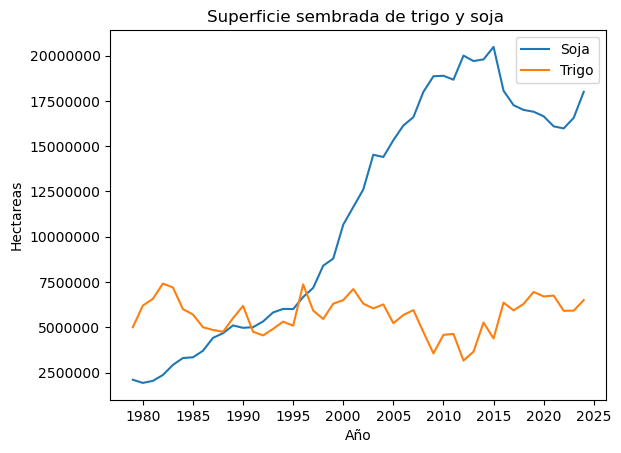

In [12]:
# Definimos los vectores para hacer el gráfico
x1 = pd.to_datetime(df["indice_tiempo"])
y1 = df["soja_hectareas"]
y2 = df["trigo_hectareas"]

#Armamos el gráfico
plt.plot(x1, y1, label="Soja") # serie 1
plt.plot(x1, y2, label="Trigo")# serie 2

#Hacemos que el eje "y" no este con notacion cientifica
plt.ticklabel_format(style='plain', axis='y')
# Agrega etiquetas y título para mayor claridad
plt.title('Superficie sembrada de trigo y soja ')
plt.legend()
plt.xlabel('Año')
plt.ylabel('Hectareas')

# Muestra el gráfico
plt.show()

In [ ]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 


### Parte B

#### Ejercicio 4 - Documentando noticias locales y en el extranjero
Eligan dos sitios web de noticias: uno de Argentina y uno del extranjero (puede ser en castellano o en inglés como el *New York Times*).

Utilicen herramientas de webscraping para obtener los **links** de las noticias de la portada en ambos diarios. Guarden cada titular con los links obtenidos en un dataframe. Por lo tanto, debe quedarles un dataframe de 4 columnas: una columna para noticias locales, otra para su link, otra columna de noticias extranjeras y una ultima columna de sus links. Luego, expórtenlo a un archivo de excel.

En el reporte este esta parte B:
1) Inserten una captura de pantalla de la pagina del diario extranjero y en Argentina de las cuales hacen el ejercicio de extraer titulares y sus links correspondientes. Esto servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.
2) Comenten brevemente (1 párrafo) las diferencias/similitudes al extraer titulares en diarios de Argentina versus diario extranjero
3) Comenten brevemente (1 párrafo) las dificultades y cómo resolvieron dichas dificultades.

*Nota*: es posible que logren obtener los links a las noticias sin el dominio: por ejemplo "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

In [ ]:
# Resolver acá
